# **Device Type Identification**

## **Data Pre-processing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/test_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0


In [ ]:
data['Application Type'] = 0 * data['AR/VR/Gaming'].astype(int) + 1 * data['Healthcare'].astype(int) + 2 * data['Industry 4.0'].astype(int) + 3 * data['IoT Devices'].astype(int) + 4 * data['Public Safety'].astype(int) + 5 * data['Smart City & Home'].astype(int) + 6 * data['Smart Transportation'].astype(int) + 7 * data['Smartphone'].astype(int)
data

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Application Type
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,6
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,9,22,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,6
31580,20,9,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,2
31581,8,0,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,2
31582,13,11,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1,7


In [ ]:
# X = data.drop(columns=['LTE/5g Category', 'Time'])

features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.001000,100,0,1,1,0
1,0.000001,10,1,0,0,1
2,0.001000,50,1,0,1,0
3,0.001000,50,1,0,1,0
4,0.001000,50,0,1,0,1
...,...,...,...,...,...,...
31579,0.000001,10,1,0,0,1
31580,0.000001,10,1,0,0,1
31581,0.000001,10,1,0,0,1
31582,0.010000,75,0,1,0,1


In [ ]:
y = data['Application Type']
y

0        0
1        6
2        2
3        2
4        0
        ..
31579    6
31580    2
31581    2
31582    7
31583    2
Name: Application Type, Length: 31584, dtype: int64

In [ ]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
29413,0.000001,10,1,0,0,1
15104,0.010000,75,0,1,0,1
13685,0.001000,100,0,1,1,0
30141,0.010000,300,1,0,1,0
1395,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
29802,0.001000,50,0,1,0,1
5390,0.001000,50,1,0,1,0
860,0.010000,50,1,0,0,1
15795,0.010000,300,1,0,1,0


In [ ]:
X_val

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
27970,0.001000,50,1,0,1,0
4148,0.000001,10,1,0,0,1
2527,0.000001,10,1,0,0,1
29113,0.001000,150,0,1,0,1
2388,0.000001,100,0,1,1,0
...,...,...,...,...,...,...
1346,0.001000,50,1,0,1,0
1282,0.000001,100,0,1,1,0
30757,0.000001,300,0,1,0,1
2310,0.000001,60,0,1,1,0


In [ ]:
y_train

29413    6
15104    7
13685    7
30141    3
1395     7
        ..
29802    0
5390     2
860      5
15795    5
23654    0
Name: Application Type, Length: 28425, dtype: int64

In [ ]:
y_val

27970    2
4148     4
2527     6
29113    7
2388     7
        ..
1346     2
1282     7
30757    7
2310     7
10004    0
Name: Application Type, Length: 3159, dtype: int64

# **EDA**

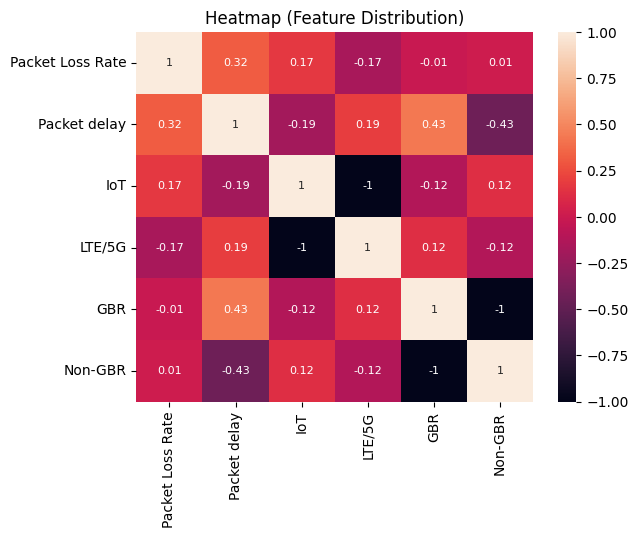

In [ ]:
# Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

## **Cluster Analysis**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [ ]:
# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
!pip install gap-stat

In [ ]:
# Gap Statistics
from gap_statistic import OptimalK

# Define the range of cluster values to explore
cluster_range = np.arange(1, 11)
optimal_k = OptimalK(parallel_backend='joblib')
optimal_k(X_train, cluster_array=cluster_range)

n_clusters = optimal_k.gap_df.n_clusters.values[np.argmax(optimal_k.gap_df.gap_value.values)]
print("Optimal number of clusters:", n_clusters)

plt.plot(cluster_range, optimal_k.gap_df.gap_value.values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
optimal_k.gap_df

# **Data Modelling**

In [ ]:
from sklearn.cluster import KMeans

# Create a KMeans model
kmeans_model = KMeans(n_clusters=8, random_state=42)

# Fit the model to the training data
kmeans_model.fit(X_train)

# Predict the labels for the validation data
y_pred = kmeans_model.predict(X_val)
y_pred

In [ ]:
labels = kmeans_model.labels_
centers = kmeans_model.cluster_centers_

In [ ]:
labels

In [ ]:
centers

In [ ]:
# Mathematically, the inertia is defined as the sum of the squared distances between the data point and the centroid of the cluster
# print("Inertia (Within-Cluster Sum of Squares):", kmeans.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score

# It Provides a measure of how well-separated clusters are in the data with the score ranging from -1 to 1
silhouette_score_value1 = silhouette_score(X_train, labels)
print("Silhouette Score for Training Data:", silhouette_score_value1)

silhouette_score_value2 = silhouette_score(X_val, y_pred)
print("Silhouette Score for Validation Data:", silhouette_score_value2)

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calculate the Adjusted Rand Index
# It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ari_train = adjusted_rand_score(y_train, labels)
ari_val = adjusted_rand_score(y_val, y_pred)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Training(Labelled) Data:", ari_train)
print("Adjusted Rand Index for Validation(Labelled) Data:", ari_val)

In [ ]:
# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # Plot the data points and cluster centers
# plt.scatter(X_train['Packet Loss Rate'], X_train['Packet delay'], c=labels, cmap='viridis', edgecolors='k', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
# plt.title('Device Type Identification')
# plt.xlabel('Packet Loss Rate')
# plt.ylabel('Packet delay')
# plt.legend()
# plt.show()

In [ ]:
# # Principal Component Analysis (PCA)
# from sklearn.decomposition import PCA
# scaler = StandardScaler()

In [ ]:
# X_train_scaled = scaler.fit_transform(X_train)
# pca = PCA(n_components=6)
# X_train_pca = pca.fit_transform(X_train_scaled)
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', alpha=0.8)
# plt.title('PCA Visualization for Training Data')
# plt.show()

In [ ]:
# X_test_scaled = scaler.fit_transform(X_test)
# pca = PCA(n_components=6)
# X_test_pca = pca.fit_transform(X_test_scaled)
# plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.8)
# plt.title('PCA Visualization for Test Data')
# plt.show()

In [ ]:
# # Include the 'labels' as a new column in the DataFrame for coloring
# X_train['Cluster'] = labels
# X_train.head(20)

In [ ]:
# # selected_columns = ['Packet Loss Rate', 'Packet delay', 'Cluster']
# selected_columns = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'Cluster']
# selected_features = X_train[selected_columns]
# selected_features

In [ ]:
# # Create a pair plot
# sns.pairplot(selected_features, hue='Cluster', palette='viridis', markers=['o', 's', 'D', '^', 'v', '<', '>', 'p'])
# plt.suptitle('Pair Plot with Clusters', y=1.02)
# plt.show()

# **Performance Evaluation**

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
test_data.head()

In [ ]:
test_data['Application Type'] = 0 * test_data['AR/VR/Gaming'].astype(int) + 1 * test_data['Healthcare'].astype(int) + 2 * test_data['Industry 4.0'].astype(int) + 3 * test_data['IoT Devices'].astype(int) + 4 * test_data['Public Safety'].astype(int) + 5 * test_data['Smart City & Home'].astype(int) + 6 * test_data['Smart Transportation'].astype(int) + 7 * test_data['Smartphone'].astype(int)
test_data

In [ ]:
# features=['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# X_test_new = test_data.drop(columns=['LTE/5g Category', 'Time', 'slice Type', 'Application Type'])
X_test = test_data[features]
X_test

In [ ]:
y_test = test_data['Application Type']

# Assuming labels_true contains the true labels for your test set
labels_true = y_test
labels_true

In [ ]:
# Predict cluster labels for the test set
labels_test = kmeans_model.predict(X_test)
labels_test

In [ ]:
silhouette_test_score_value = silhouette_score(X_test, labels_test)
print("Silhouette Score for Testing Data:", silhouette_test_score_value)

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calculate the Adjusted Rand Index
ari_test = adjusted_rand_score(labels_true, labels_test)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ari_test)